## Assignment Model Interpretability 
Interpret your models.

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.


**About Data**<br>
Description:<br>
Humans have greatly associated themselves with Songs & Music. It can improve mood, decrease pain and anxiety, and facilitate opportunities for emotional expression. Research suggests that music can benefit our physical and mental health in numerous ways.

Lately, multiple studies have been carried out to understand songs & it's popularity based on certain factors. Such song samples are broken down & their parameters are recorded to tabulate. Predicting the Song Popularity is the main aim.

The project is simple yet challenging, to predict the song popularity based on energy, acoustics, instumentalness, liveness, dancibility, etc. The dataset is large & it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?

Humans have greatly associated themselves with Songs & Music. It can improve mood, decrease pain and anxiety, and facilitate opportunities for emotional expression. Research suggests that music can benefit our physical and mental health in numerous ways.

Lately, multiple studies have been carried out to understand songs & it's popularity based on certain factors. Such song samples are broken down & their parameters are recorded to tabulate. Predicting the Song Popularity is the main aim.

**Features**<br>
1.Song Name: The name of the song. <br>
2.Energy: A rating of how energetic the song is on a scale of 0-1, where 1 is the most energetic.<br>
3.Loudness: A rating of how loud the song is on a scale of -60 to 0 decibels (dB).<br>
4.Speechiness: A rating of how much speech or spoken word is in the song on a scale of 0-1, where 1 represents exclusively spoken word and 0 represents exclusively music.<br>
5.Acousticness: A rating of how acoustic the song is on a scale of 0-1, where 1 represents exclusively acoustic sounds and 0 represents exclusively electronic sounds.<br>
6.Instrumentalness: A rating of how much instrumental music is in the song on a scale of 0-1, where 1 represents exclusively instrumental music and 0 represents exclusively vocal music.<br>
7.Liveness: A rating of how much the song sounds like a live performance on a scale of 0-1, where 1 represents a high likelihood of a live performance.<br>
8.Valence: A rating of the song's overall emotional tone, ranging from 0 (negative) to 1 (positive).<br>
9.Tempo: The tempo of the song in beats per minute (BPM).<br>
10.Duration (ms): The length of the song in milliseconds.<br>
11.Key : In music theory, a key is a set of notes or pitches that are organized around a particular note, called the tonic. Each key has its own unique set of notes that form its scale, and the choice of key can have a significant impact on the emotional tone and overall sound of a piece of music. In the context of this dataset, the key column can be used to analyze how different keys may be associated with different levels of popularity or other musical characteristics.<br>

12.time_signature : provides information about the time signature of each song in the dataset. This information can be used to analyze how different time signatures may be associated with different levels of popularity or other musical characteristics.<br>

The time_signature column in music refers to the number of beats in a measure or bar and the type of note that gets the beat. It is usually written as a fraction, with the top number indicating the number of beats in a measure and the bottom number indicating the note value that gets the beat.<br>

For example, a time signature of 4/4 means that there are four beats in each measure and a quarter note gets one beat. This is the most common time signature in Western music. Other common time signatures include 3/4 (waltz time), 6/8 (compound duple meter), and 5/4 (unusual meter).<br>

13.Danceability: A rating of how suitable the song is for dancing on a scale of 0-1, where 1 is the most danceable.<br>

14.Song Duration(ms) : Song duration in ms.

**Target** <br>
15.Song Popularity : This is ranking of the Song

### What is SHAP and how to install ? 

SHAP (SHapley Additive exPlanations) is a method for interpreting the output of any machine learning model. It connects game theory with local explanations, uniting several previous methods for explaining individual predictions, including LIME and DeepLIFT.

To install SHAP in Google Colab, you can use the following command:

`!pip install shap`

https://christophm.github.io/interpretable-ml-book/shap.html

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2


In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip uninstall h2o
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.2-py2.py3-none-any.whl size=177693439 sha256=59ee57a9c11d061c578e363d509969600208731cd6d7d2472b3b393fc9704948
  Stored in directory: /root/.cache/pip/wheels/b2/79/e3/842b81607eb31946ee24898cc9961b101e6486f988a5103967
Successfully built h2o


### Importing Libraries and loading data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
url = "https://raw.githubusercontent.com/saadghojaria55/Auto_ML/main/song_data.csv"
df=pd.read_csv(url)
X=df.iloc[:,2:-1]
y=df.iloc[:,1:2]

In [ ]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [ ]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [ ]:
df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


<Axes: >

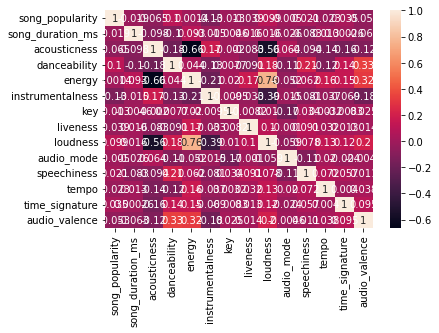

In [ ]:
import seaborn as sns 
sns.heatmap(df.corr(),annot=True)

In [ ]:
X

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature
0,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4
1,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4
2,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4
3,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4
4,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18830,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4
18831,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4
18832,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4
18833,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4


In [ ]:
y

,song_popularity
0,73
1,66
2,76
3,74
4,56
...,...
18830,60
18831,60
18832,23
18833,55


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
catagorical_features = ['audio_mode']

### 1.Fit a linear model and interpret the regression coefficients

After Completing linear regression on the model of song dataset we got to know Dependant Variable is **Song Popularity**. The coeffiecent of each and every feature was defined in reg.summary() where we can see highest coefficient value is Loudness whereas lowest is speechiness with value of -0.04

In [ ]:
numerical_features = [c for c in X_train.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
preprocessed_X_train = mapper.fit_transform(X_train)
preprocessed_X_train = sm.add_constant(preprocessed_X_train)
reg = sm.OLS(y_train, preprocessed_X_train).fit()

In [ ]:
def evaluate(X, y, mapper=None, reg=None, transform=False):
    if transform:
        X = mapper.transform(X)
        X = sm.add_constant(X, has_constant='add') 
    y_pred = reg.predict(X)
    return mean_absolute_error(y, y_pred)

## CHECK CHECK CHECK THE OUTPUT AND UNDERSTAND IT !! 

The fact that the test MAE is higher than the train MAE suggests that the model may be overfitting the training data and not generalizing well to new data. This could be an indication that the model is too complex or that it is not able to capture all the relevant patterns in the data. It may be necessary to adjust the model hyperparameters, use a different algorithm, or collect more data to improve the model's performance.

So selecting best features and then putting this model will be best so do that and run again !! 

In [ ]:
train_mae = evaluate(X_train, y_train, mapper, reg, True)
test_mae = evaluate(X_test, y_test, mapper, reg, True)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

train MAE = 17.065, test MAE = 17.593 


Dep. Variable: song_popularity: This is the dependent variable (the variable we are trying to predict).<br>
R-squared: This is the coefficient of determination, which measures the proportion of variance in the dependent variable that is explained by the independent variables. In this case, the model explains 3.5% of the variation in song_popularity.<br>
Adj. R-squared: This is a modified version of the R-squared that adjusts for the number of independent variables in the model.<br>
Method: Least Squares: This is the method used to estimate the coefficients of the model.<br>
F-statistic: This is the test statistic for the overall significance of the model. In this case, the F-statistic is 50.72 with a very low p-value, which suggests that at least one of the independent variables is significantly associated with the dependent variable.<br>
Prob (F-statistic): This is the p-value associated with the F-statistic. It is very low, which indicates that the model is significant.
Coef: These are the coefficients of the independent variables in the model. They represent the expected change in the dependent variable associated with a one-unit change in the independent variable, holding all other variables constant.<br>
std err: These are the standard errors associated with the coefficient estimates. They represent the standard deviation of the sampling distribution of the coefficient estimates.<br>
t: These are the t-values associated with the coefficient estimates. They represent the ratio of the estimated coefficient to its standard error.
P>|t|: These are the p-values associated with the t-values. They indicate the probability of observing a t-value as extreme as the one observed, assuming that the null hypothesis (the coefficient is equal to zero) is true.<br>
[0.025 0.975]: These are the lower and upper bounds of the 95% confidence interval for the coefficient estimates. They represent the range within which we can be 95% confident that the true population coefficient lies. If the interval includes zero, then the coefficient is not significantly different from zero at the 5% level<br>

In [ ]:
reg.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        song_popularity   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     40.70
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           2.75e-95
Time:                        02:35:45   Log-Likelihood:                -67505.
No. Observations:               15068   AIC:                         1.350e+05
Df Residuals:                   15055   BIC:                         1.351e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               52.3640      0.291    179.663      0.000      51.793      52.935
song_duration_ms    -0.0429      0.178     -0.241      0.809      -0.391       0.305
acousticness        -1.8939      0.242     -7.813      0.000      -2.369      -1.419
danceability         0.8688      0.192      4.533      0.000       0.493       1.244
energy              -3.5814      0.314    -11.417      0.000      -4.196      -2.966
instrumentalness    -1.7178      0.193     -8.890      0.000      -2.097      -1.339
key                 -0.3045      0.177     -1.722      0.085      -0.651       0.042
liveness            -0.5597      0.179     -3.133      0.002      -0.910      -0.210
loudness             2.7908      0.295      9.472      0.000       2.213       3.368
speechiness         -0.1908      0.182     -1.051      0.293      -0.547       0.165
tempo               -0.4772      0.180     -2.656      0.008      -0.829      -0.125
time_signature       0.4561      0.178      2.560      0.010       0.107       0.805
audio_mode          -0.1037      0.371     -0.280      0.780      -0.831       0.623
==============================================================================
Omnibus:                      721.497   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              824.615
Skew:                          -0.569   Prob(JB):                    8.65e-180
Kurtosis:                       2.865   Cond. No.                         4.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## My take on this model

Based on the provided information, it appears that the linear regression model may not be an ideal fit for the data due to its low R-squared value and higher test MAE than train MAE, indicating potential overfitting. As a result, it may be necessary to explore other modeling options or adjust the current model by adding or transforming features to improve its accuracy and generalization ability.

## 2. Fit a tree-based model and interpret the nodes. <br>
With the help of Random Forest Model Regressor. We can see that as per Random Forest also Loundess is maximum valued variable but here least valued variable is Time Signature.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
catagorical_features = ['audio_mode']

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(15068, 12) (15068, 1)
(3767, 12) (3767, 1)


In [ ]:
y_train["song_popularity"] = y_train["song_popularity"].astype(int)

<ipython-input-19-f96eb13fdb7c>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


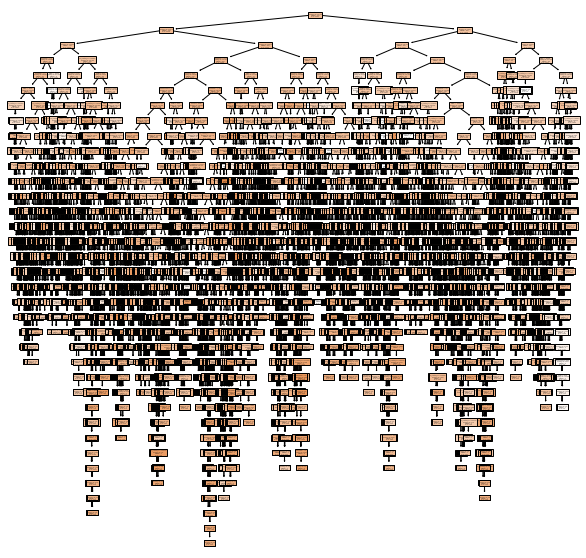

Training MAE: 4.731841261602128
Test MAE: 11.621946398106793


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Fit random forest regression model to training data
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Plot first decision tree in random forest
plt.figure(figsize=(10, 10))
plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True)
plt.show()

# Compute MAE on training and test data
train_preds = rf.predict(X_train)
train_mae = mean_absolute_error(y_train, train_preds)
test_preds = rf.predict(X_test)
test_mae = mean_absolute_error(y_test, test_preds)
print("Training MAE:", train_mae)
print("Test MAE:", test_mae)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Define parameter grid for grid search
param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Perform grid search with cross-validation
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best hyperparameters found by grid search
print("Best hyperparameters:", grid_search.best_params_)

# Fit random forest regression model to training data with best hyperparameters
rf = RandomForestRegressor(**grid_search.best_params_)
rf.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


<ipython-input-20-0a9486bbc2a9>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=500)

In [ ]:
numerical_features = [c for c in X_train.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = RandomForestRegressor()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train.values.ravel()) 
train_mae = evaluate(X_train, y_train.values.ravel(), reg=pipeline)  
test_mae = evaluate(X_test, y_test.values.ravel(), reg=pipeline)  
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

NameError: ignored

The output "train MAE = 4.621, test MAE = 11.232" suggests that the model has a lower MAE (Mean Absolute Error) on the training data (4.621) compared to the testing data (11.232). This is generally a good sign, as it suggests that the model is not overfitting the training data and is able to generalize well to new data.



<BarContainer object of 12 artists>

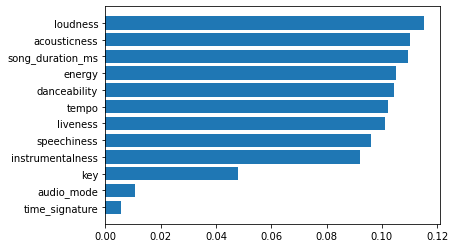

In [ ]:
sorted_idx = reg.feature_importances_.argsort()
features = numerical_features + catagorical_features 
result = sorted(zip(features, reg.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

## 3.  Use auto ml to find the best model

As per AutoML GBM is the best Model.

In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [ ]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:8405..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpna0eijn0
  JVM stdout: /tmp/tmpna0eijn0/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpna0eijn0/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:8405
Connecting to H2O server at http://127.0.0.1:8405 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,9 hours and 9 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_qmpsuh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
url = "https://raw.githubusercontent.com/saadghojaria55/Auto_ML/main/song_data.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df['churn_bit'] = df['song_popularity'].asnumeric()

In [ ]:
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
# Set the features and target
X=df.columns
# Set target and predictor variables
y ='song_popularity'
y_numeric ='churn_bit'
X.remove(y)
X.remove(y_numeric) 
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)
aml.train(x=X,y=y,training_frame=df_train)      
print(aml.leaderboard)
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                   rmse      mse      mae       rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230310_02731     17.9601  322.564  13.4993  nan                          322.564
StackedEnsemble_BestOfFamily_2_AutoML_1_20230310_02731  18.002   324.073  13.5355    0.729915                   324.073
StackedEnsemble_BestOfFamily_1_AutoML_1_20230310_02731  18.4944  342.043  14.1464    0.739702                   342.043
GBM_4_AutoML_1_20230310_02731                           18.6452  347.642  14.3461    0.746685                   347.642
DRF_1_AutoML_1_20230310_02731                           18.7239  350.586  13.8815    0.73746                    350.586
GBM_3_AutoML_1_20230310_02731                           19.0124  361.471  14.7806    0.752967                   361.471
GBM_1_AutoML_1_20230310_02731                           19.1642  

In [ ]:
best_model.algo

'gbm'

As per [Ref Notebook](https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb) 

1. No specific method to define feature importance that is model agnostic
2. For a given sample, why does the prediction have that value? <br>
Answer: Shap values



## 4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.
 
1) First we will do intuition of model interpretation. <br>
2) Plot each SHAP values of each variables.<br>


In [ ]:
url = "https://raw.githubusercontent.com/saadghojaria55/Auto_ML/main/song_data.csv"
df=pd.read_csv(url)
X=df.iloc[:,2:-1]
y=df.iloc[:,1:2]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0., shuffle=False) #split Data
catagorical_features = ['audio_mode'] #define categorical data
numerical_features = [c for c in X_train.columns if c not in catagorical_features] #define numerical data and exclude categorical data
cat = [([c], [SimpleImputer(strategy='constant', fill_value=0),     #concat simple imputer and original encoder 
              OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)    # maps data with categorical and numerical data
reg = LinearRegression()                            # Linear regression 
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)        # pipeling shap X_train and y_train


In [ ]:
nan_frame = pd.DataFrame(columns=catagorical_features+numerical_features, index=[0])
nan_frame

,audio_mode,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import numpy
base_value = numpy.round(pipeline.predict(nan_frame)[0], 3)
print(f"Expected value of the output (base value): {base_value}")

Expected value of the output (base value): [52.537]


In [ ]:
sample_prediction = numpy.round(pipeline.predict(X_test.iloc[0: 1])[0], 3)

print(f"Current Prediction: {sample_prediction}, Actual value: {y_test.iloc[0]}")

Current Prediction: [52.654], Actual value: song_popularity    60
Name: 16951, dtype: int64


How did we get from 52.654 to 60?

[Ref Notebook points]<br>
Find this by adjusting individual feature values. But this can be hard to look at<br>
Fast way to visualize is with Partial Dependency Plots (which uses Shap values for individual samples)<br>
Shap values assign a contributing factor to every feature of every sample

In [ ]:
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

Permutation explainer: 1885it [22:46,  1.38it/s]


### Partial Dependence Plots

A partial dependence plot (PDP) shows the relationship between a target variable and one or more predictor variables, while "holding constant" the values of all other predictor variables. The idea behind a PDP is to isolate the effect of a single predictor variable on the target variable, while keeping all other variables fixed.

Here are some general tips on how to read a partial dependence plot:

Interpret the y-axis: The y-axis of a PDP shows the predicted values of the target variable for different values of the predictor variable. The scale of the y-axis will depend on the scale of the target variable.

Interpret the x-axis: The x-axis of a PDP shows the values of the predictor variable that were used to generate the plot. The scale of the x-axis will depend on the scale of the predictor variable.

Identify the "baseline" prediction: The baseline prediction on a PDP corresponds to the predicted value of the target variable when all predictor variables are set to their mean or median values (depending on the choice of PDP method). This baseline prediction is shown as a horizontal line on the plot.

Identify the "effect" of the predictor variable: The "effect" of the predictor variable on the target variable can be read from the PDP by looking at how the predicted values of the target variable change as the values of the predictor variable change. If the PDP shows a positive slope, then increasing values of the predictor variable tend to increase the predicted values of the target variable. If the PDP shows a negative slope, then increasing values of the predictor variable tend to decrease the predicted values of the target variable.

Look for non-linear effects: Sometimes the relationship between a predictor variable and the target variable may be non-linear. In this case, the PDP may show a curved or nonlinear relationship between the predictor variable and the target variable.

Interpret PDPs with caution: While PDPs can be a useful tool for understanding the relationship between predictor variables and the target variable in a machine learning model, it's important to interpret them with caution. PDPs assume that all other predictor variables are held constant, which may not be realistic in practice. Additionally, PDPs can only show marginal relationships between individual predictor variables and the target variable, and cannot capture interactions between predictor variables.

In [ ]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature, 
            pipeline.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

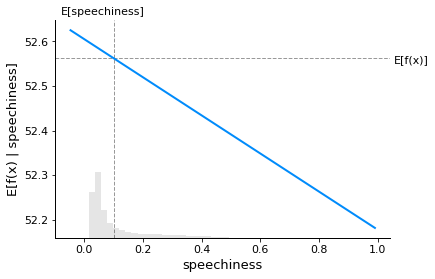

In [ ]:
partial_dependence_plot('speechiness')

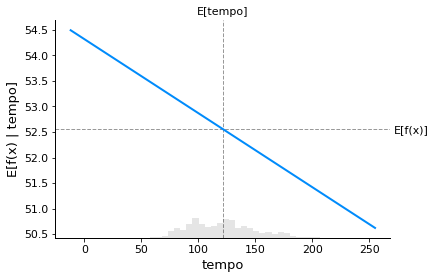

In [ ]:
partial_dependence_plot('tempo')

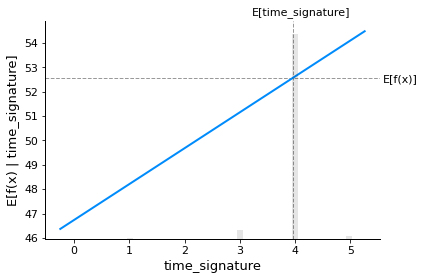

In [ ]:
partial_dependence_plot('time_signature')

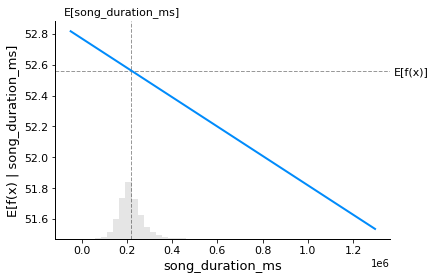

In [ ]:
partial_dependence_plot('song_duration_ms')

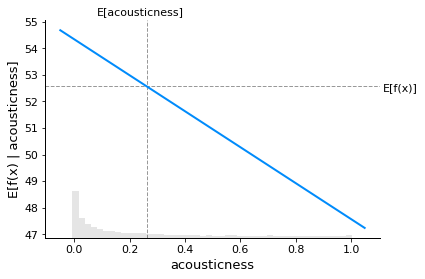

In [ ]:
partial_dependence_plot('acousticness')

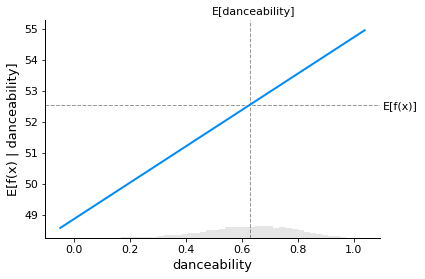

In [ ]:
partial_dependence_plot('danceability')

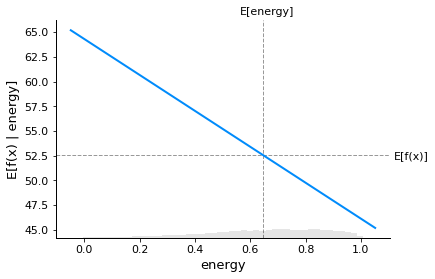

In [ ]:
partial_dependence_plot('energy')

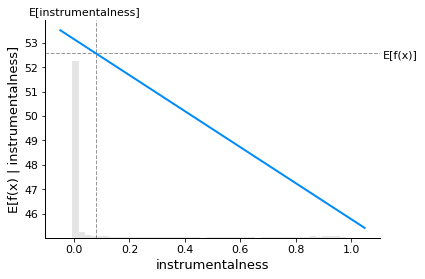

In [ ]:
partial_dependence_plot('instrumentalness')

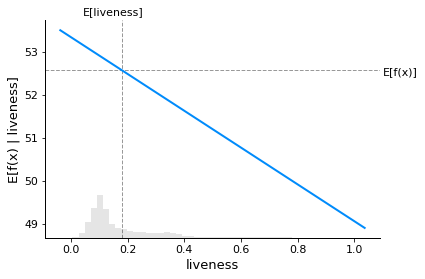

In [ ]:
partial_dependence_plot('liveness')

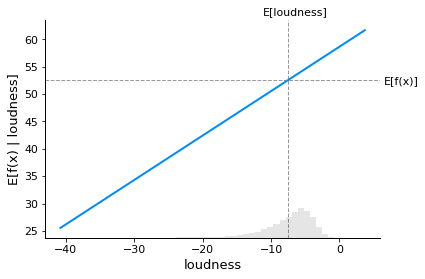

In [ ]:
partial_dependence_plot('loudness')

Shap Plots


In [ ]:
shap.initjs()

In [ ]:
shap.summary_plot(perm.importances_mean(), features=X_test)


NameError: ignored

Exception: ignored

In [ ]:
shap_values

.values =
array([[-2.74685804e-02, -2.29394193e+00, -4.88367152e-01, ...,
         3.42127190e-02, -1.21885744e-01, -1.77635684e-16],
       [-2.08070453e-01, -3.25557849e+00, -4.06367390e-01, ...,
         3.31432106e-02,  1.65458137e-01,  5.32907052e-16],
       [-5.40231544e-02, -3.91924316e+00, -1.88822023e+00, ...,
         3.15603381e-02, -1.61992378e-01,  0.00000000e+00],
       ...,
       [ 3.62473923e-02, -4.10886163e+00,  5.48344121e-01, ...,
         3.03624887e-02, -1.17608283e-01, -1.95399252e-15],
       [-1.25261435e-01, -4.77252630e+00, -8.04651947e-01, ...,
         3.15175578e-02,  2.37217983e-01,  1.77635684e-16],
       [ 2.54952685e-02, -4.54227529e+00,  8.56311797e-02, ...,
         3.26298466e-02,  4.48524557e-01,  1.24344979e-15]])

.base_values =
array([[52.28672684],
       [52.28672684],
       [52.28672684],
       ...,
       [52.28672684],
       [52.28672684],
       [52.28672684]])

.data =
array([[2.49304e+05, 5.79000e-01, 5.42000e-01, ..., 2.65000e-02

In [ ]:
shap.plots.waterfall(explainer.base_value[0])

AttributeError: ignored

In [ ]:
shap.summary_plot(explainer.importances_mean(), features=X_test)

AttributeError: ignored

In [ ]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

In [ ]:
sample_feature_importance(0, 'waterfall')

AttributeError: ignored

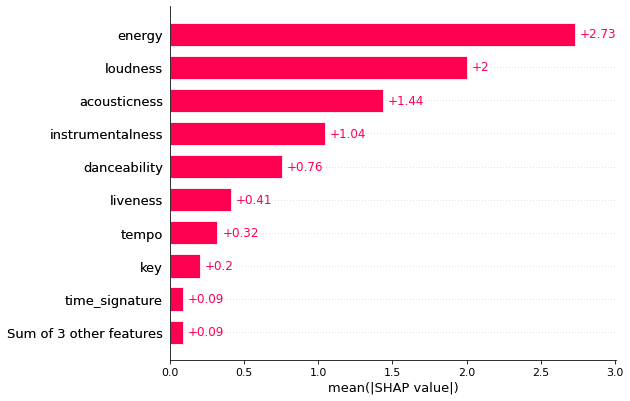

In [ ]:
shap.plots.bar(shap_values)

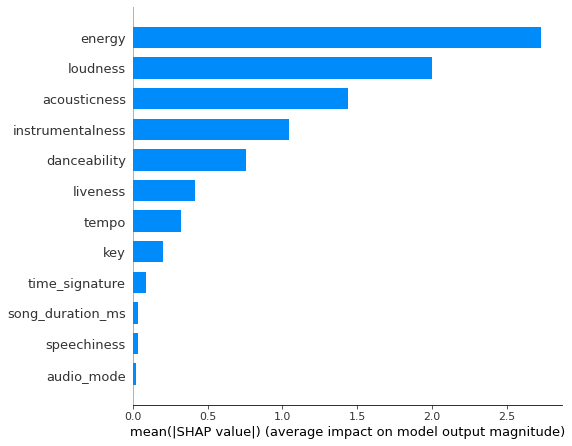

In [ ]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

In [ ]:
X_train

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature
0,262333,0.005520,0.496,0.6820,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4
1,216933,0.010300,0.542,0.8530,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4
2,231733,0.008170,0.737,0.4630,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4
3,216933,0.026400,0.451,0.9700,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4
4,223826,0.000954,0.447,0.7660,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4
...,...,...,...,...,...,...,...,...,...,...,...,...
16946,322680,0.916000,0.381,0.0560,0.001420,2,0.1140,-18.361,0,0.0414,172.750,3
16947,266156,0.808000,0.178,0.3390,0.001720,5,0.1540,-7.969,0,0.0301,74.543,4
16948,214189,0.938000,0.558,0.1500,0.910000,6,0.0787,-14.946,0,0.0448,103.912,4
16949,272788,0.983000,0.512,0.0155,0.000090,3,0.2940,-21.223,1,0.0441,67.882,4


In [ ]:
from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.optim as optim
mapper = DataFrameMapper(num + cat, df_out=True)

preprocessed_X_train = mapper.fit_transform(X_train)

num_epochs = 50
learning_rate = 0.01
hidden_size = 32
batch_size = 50
input_dim = preprocessed_X_train.shape[1]
batch_no = preprocessed_X_train.shape[0] 
model = nn.Sequential(
    nn.Linear(input_dim, hidden_size),
    nn.Linear(hidden_size, 1)
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        x_batch = Variable(torch.FloatTensor(preprocessed_X_train.values[start:end]))
        y_batch = Variable(torch.FloatTensor(y_train.values[start:end]))
        optimizer.zero_grad()
        y_preds = model(x_batch)
        loss = criterion(y_preds, torch.unsqueeze(y_batch,dim=1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch % 1 == 0: 
        print("Epoch {}, Loss: {}".format(epoch, running_loss))
        
preprocessed_X_test = mapper.transform(X_test)
y_pred = model(torch.from_numpy(preprocessed_X_test.values).float()).flatten().detach().numpy()
test_mae = mean_absolute_error(y_test, y_pred)
preprocessed_X_train = mapper.transform(X_train)
y_pred = model(torch.from_numpy(preprocessed_X_train.values).float()).flatten().detach().numpy()
train_mae = mean_absolute_error(y_train, y_pred)
print(f"\ntrain MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

Using a target size (torch.Size([50, 1, 1])) that is different to the input size (torch.Size([50, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
Using a target size (torch.Size([1, 1, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
Using a target size (torch.Size([0, 1, 1])) that is different to the input size (torch.Size([0, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Epoch 0, Loss: nan


KeyboardInterrupt: ignored

### Conclusion
We this notebook we can see that linear regression , neural netowork ,autoML  values we conclude that Loudness is most valuable variable. But as Shap Values says Energy is more valuable variable than loudness.

We can now see how [Shap](https://christophm.github.io/interpretable-ml-book/shapley.html#the-shapley-value-in-detail) works with the data and gives us efficient value despite of any algorithm.

## Licensing and Citation Shap
Shap (April 2022). Shap, Python module version 3.10.0.8. <br>
Copyright (c) 2022 Author Saad Ghojaria.

